#**Import Libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # high-level API for creating interactive visualizations
!pip install optuna
import optuna   #using for hyperparameter optimization
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from scipy.stats import reciprocal, uniform
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Parkinsson disease.csv to Parkinsson disease (1).csv


In [3]:
df = pd.read_csv("Parkinsson disease.csv")

**Features Explanation**

 * name - ASCII subject name and recording number

* MDVP:Fo(Hz) - Average vocal fundamental frequency

* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

* MDVP:Flo(Hz) - Minimum vocal fundamental frequency

* MDVP:Jitter(%)

* MDVP:Jitter(Abs)

* MDVP:RAP

* MDVP:PPQ

* jitter DDP

* MDVP:Shimmer

* MDVP:Shimmer(dB)

* Shimmer:APQ3

* Shimmer:APQ5

* MDVP:APQ

* Shimmer:DDA - Several measures of variation in amplitude

* NHR

* HNR - Two measures of ratio of noise to tonal components in the voice

* status - Health status of the subject (1) - Parkinson's, (0) - healthy

* RPDE

* D2 - Two nonlinear dynamical complexity measures

* DFA - Signal fractal scaling exponent

* spread1

* spread2

* PPE - Three nonlinear measures of fundamental frequency variation 9

#**Data Visualization**




In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#**Missing Data Handeling**

In [6]:
df.isnull().values.any()

np.False_

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


📌 Intended Use & Clinical Context

This AI model is developed to support **early detection of Parkinson’s Disease** based on acoustic features from patient voice recordings. It performs **binary classification** (Parkinson’s vs. Healthy) and is intended to assist healthcare professionals in decision-making during initial screenings.

👤 Intended Users
- Neurologists
- General Practitioners (especially in under-resourced settings)
- Speech Therapists
- Clinical Researchers

#########🚀 Deployment Scenario
- As part of a clinical decision support system (CDSS)
- Embedded in telemedicine or mobile screening apps
- Operated in rural clinics via web interface


#**Exploratory Data Analysis**

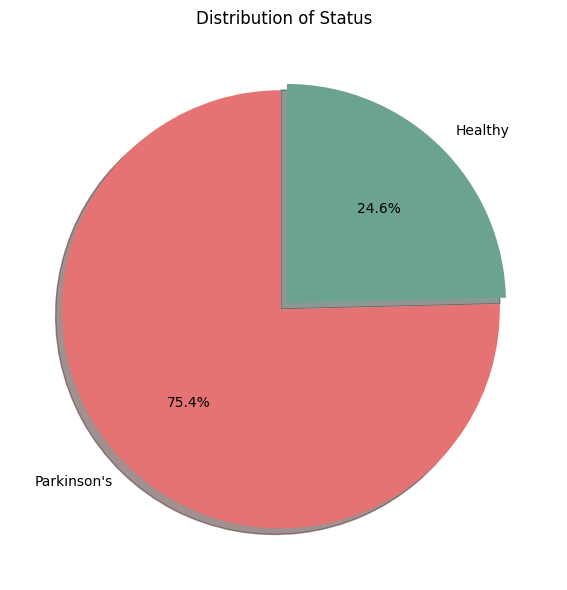

Percentage of patients diagnosed as healthy = 24.62%
Percentage of patients diagnosed with Parkinson's disease = 75.38 %


In [9]:
# Map numeric status to readable labels
label_map = {0: 'Healthy', 1: "Parkinson's"}
status_counts = df['status'].map(label_map).value_counts()

# Define custom pastel colors
colors = ['#E57373','#6BA292']

# Plot pie chart
status_counts.plot(
    kind='pie',
    labels=status_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    figsize=(6, 6),
    startangle=90,
    explode=[0.02, 0.02],
    shadow=True
)

plt.title('Distribution of Status')
plt.ylabel('')
plt.tight_layout()
plt.show()
print("Percentage of patients diagnosed as healthy = {0:.2f}%".format((df[df.status == 0].shape[0]/df.shape[0])*100))
print("Percentage of patients diagnosed with Parkinson's disease = {0:.2f} %".format((df[df.status == 1].shape[0]/df.shape[0])*100))

In [10]:
# Models like lgbm do not like json type names

df.rename(columns={'MDVP:Fo(Hz)': 'MDVP_Fo(Hz)', 'MDVP:Fhi(Hz)': 'MDVP_Fhi(Hz)',
        'MDVP:Flo(Hz)': 'MDVP_Flo(Hz)', 'MDVP:Jitter(%)': 'MDVP_Jitter(%)',
        'MDVP:Jitter(Abs)': 'MDVP_Jitter(Abs)', 'MDVP:RAP': 'MDVP_RAP',
        'MDVP:PPQ': 'MDVP_PPQ', 'Jitter:DDP': 'Jitter_DDP', 'MDVP:Shimmer': 'MDVP_Shimmer',
        'MDVP:Shimmer(dB)':'MDVP_Shimmer(dB)', 'Shimmer:APQ3': 'Shimmer_APQ3',
        'Shimmer:APQ5': 'Shimmer_APQ5', 'MDVP:APQ': 'MDVP_APQ', 'Shimmer:DDA': 'Shimmer_DDA'}, inplace=True)

Changes of features according to status

In [11]:
num_cols = list(df.select_dtypes(include="float64").columns)

# Correlation Between Variables

The Relationship Between Variables of Parkinson's Status

In [12]:
parkinson_corr = df.drop("name", axis=1).corr()["status"]
parkinson_corr = parkinson_corr.drop("status", axis=0)
parkinson_corr = parkinson_corr.sort_values(ascending=False)

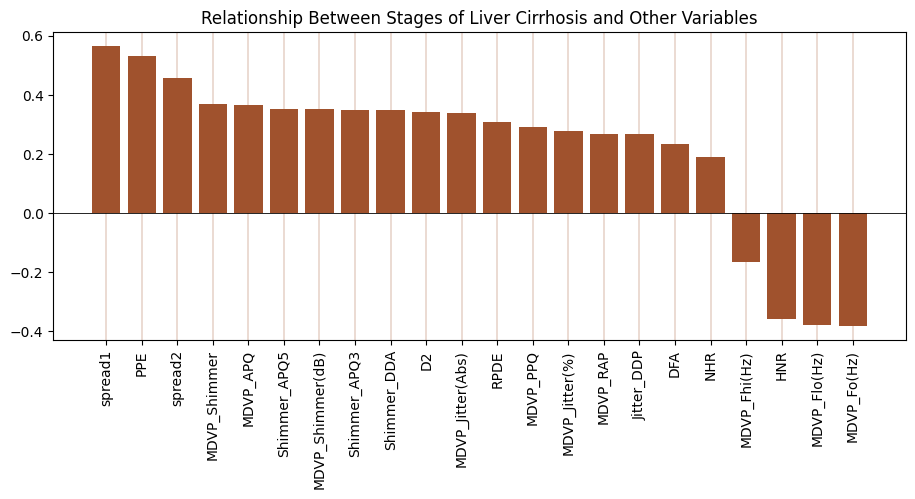

In [13]:
plt.figure(figsize=(11,4))
plt.bar(x=parkinson_corr.index, height=parkinson_corr, color="#a0522d")
plt.xticks(rotation=90)
plt.axhline(0, color="k", lw=0.6)
plt.grid(True, axis="x", lw=0.3, color="#a0522d")
plt.title("Relationship Between Stages of Liver Cirrhosis and Other Variables", fontsize=12)
plt.show()

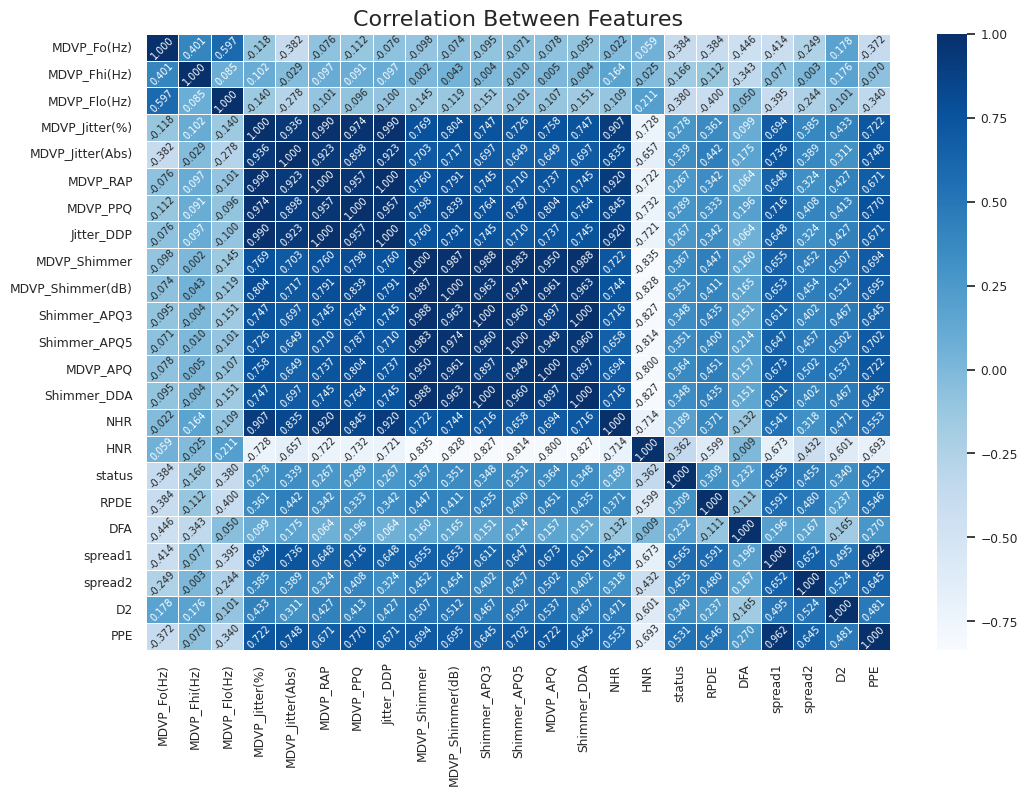

In [14]:
plt.figure(figsize=(12,8))
sns.set(font_scale=0.8)
sns.heatmap(df.drop("name", axis=1).corr(), annot=True, linewidths=0.4, fmt='.3f',
            cmap="Blues", annot_kws={'size': 7, 'rotation': 45})
plt.title("Correlation Between Features", fontsize=16)
plt.show()

#**Building and Analysis of Machine learning models**

Train-Test split

In [15]:
y = df["status"]
X = df.drop(["name", "status"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

Standardization

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy scores of models with cross-validation

In [17]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

models = [RandomForestClassifier(), HistGradientBoostingClassifier(),
              CatBoostClassifier(verbose=False), XGBClassifier(),
               GradientBoostingClassifier(), LogisticRegression(max_iter=1000, class_weight='balanced'),  KNeighborsClassifier()]

model_name_list = []
accuracy_list = []

for model in models:
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

    scores = cross_val_score(pipeline, X, y, cv=15, scoring="accuracy", n_jobs=-1)

    model_name_list.append(model.__class__.__name__)
    accuracy_list.append(scores.mean())

    print(f"{model.__class__.__name__} cross validation score: {scores.mean():.4f}")
    print("-" * 50)

RandomForestClassifier cross validation score: 0.8615
--------------------------------------------------
HistGradientBoostingClassifier cross validation score: 0.8667
--------------------------------------------------
CatBoostClassifier cross validation score: 0.8974
--------------------------------------------------
XGBClassifier cross validation score: 0.8974
--------------------------------------------------
GradientBoostingClassifier cross validation score: 0.8821
--------------------------------------------------
LogisticRegression cross validation score: 0.7692
--------------------------------------------------
KNeighborsClassifier cross validation score: 0.7949
--------------------------------------------------


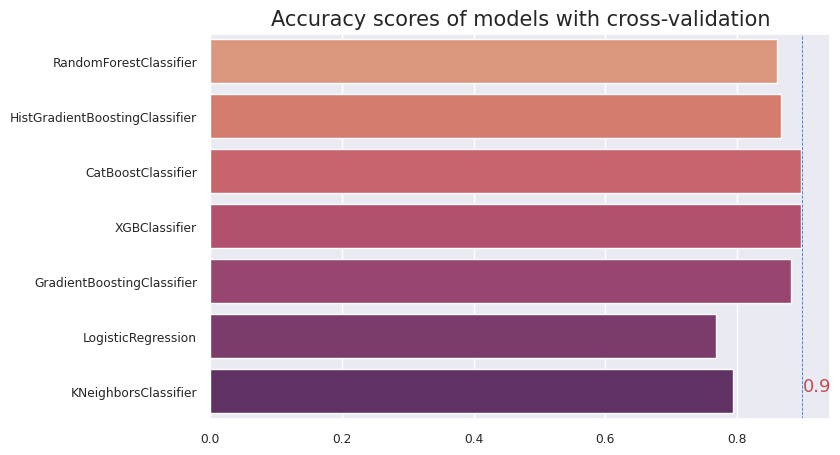

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=accuracy_list, y=model_name_list, palette="flare")
plt.title("Accuracy scores of models with cross-validation", fontsize=15)
plt.axvline(0.9, ls="--", lw=0.6, color="b")
plt.text(0.90, 6, s="0.9", fontsize=13, color="r")
plt.show()

# Hyperparameter Optimization

XGBClassifier Hyperparameter Optimization

In [19]:
study_xgb = optuna.create_study(direction="maximize")

def objective(trial):
    params_xgb = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 1000),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        'gamma': trial.suggest_float("gamma", 0, 0.5),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 10),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.6, 1.0),
        'colsample_bylevel': trial.suggest_float("colsample_bylevel", 0.6, 1.0),
        'reg_alpha': trial.suggest_float("reg_alpha", 0, 10),
        'reg_lambda': trial.suggest_float("reg_lambda", 0, 10),
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBClassifier(**params_xgb)

    # Use cross-validation on the training set only
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    return scores.mean()  # Return mean CV accuracy

study_xgb.optimize(objective, n_trials=50, n_jobs=-1)

print("Best trial:")
print(f"Accuracy: {study_xgb.best_trial.value:.4f}")
print(f"Params: {study_xgb.best_trial.params}")#new

[I 2025-06-02 12:01:52,922] A new study created in memory with name: no-name-088516b0-0278-4620-9570-483c5901f8c7
[I 2025-06-02 12:01:55,038] Trial 0 finished with value: 0.7564516129032258 and parameters: {'n_estimators': 903, 'max_depth': 10, 'learning_rate': 0.08132496373311608, 'gamma': 0.3975074893742999, 'min_child_weight': 3, 'colsample_bytree': 0.6688797442849915, 'colsample_bylevel': 0.998151563676348, 'reg_alpha': 7.350958641100633, 'reg_lambda': 4.589570220113228}. Best is trial 0 with value: 0.7564516129032258.
[I 2025-06-02 12:01:55,493] Trial 1 finished with value: 0.7564516129032258 and parameters: {'n_estimators': 774, 'max_depth': 7, 'learning_rate': 0.016587938292227957, 'gamma': 0.4940974580096377, 'min_child_weight': 5, 'colsample_bytree': 0.7382601840442561, 'colsample_bylevel': 0.9648478747824167, 'reg_alpha': 8.464982273233318, 'reg_lambda': 6.248382164470794}. Best is trial 0 with value: 0.7564516129032258.
[I 2025-06-02 12:01:56,017] Trial 2 finished with value

Best trial:
Accuracy: 0.9103
Params: {'n_estimators': 917, 'max_depth': 7, 'learning_rate': 0.07170244844813842, 'gamma': 0.12571336513489004, 'min_child_weight': 2, 'colsample_bytree': 0.6663090569342103, 'colsample_bylevel': 0.8616003638500749, 'reg_alpha': 0.6482314074902972, 'reg_lambda': 6.34909702458583}


GradientBoostingClassifier Hyperparameter Optimization

In [20]:
study_grad = optuna.create_study(direction="maximize")

def objective(trial):
    params_grad = {
        'loss': trial.suggest_categorical('loss',['log_loss', 'exponential']),
        'n_estimators': trial.suggest_int("n_estimators", 50, 800),
        'learning_rate': trial.suggest_float("learning_rate", 0.1, 0.3),
        'max_depth': trial.suggest_int("max_depth", 2, 16),
        'min_samples_split': trial.suggest_int("min_samples_split", 2, 20),
        'subsample': trial.suggest_float("subsample", 0.4, 0.99),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'random_state': 42}

    grad = GradientBoostingClassifier(**params_grad)
    grad.fit(X_train_scaled, y_train)
    y_pred = grad.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    return acc

study_grad.optimize(objective, n_trials=50, n_jobs=-1)
print("Best trial:")
print(" Value: {}".format(study_grad.best_trial.value))
print(" Params: {}".format(study_grad.best_trial.params))

[I 2025-06-02 12:02:56,709] A new study created in memory with name: no-name-8f923af6-4d09-488a-95fa-4a320a3b3104
[I 2025-06-02 12:02:58,537] Trial 1 finished with value: 0.9230769230769231 and parameters: {'loss': 'log_loss', 'n_estimators': 610, 'learning_rate': 0.26145702452211295, 'max_depth': 7, 'min_samples_split': 7, 'subsample': 0.9827970737614374, 'min_samples_leaf': 12}. Best is trial 1 with value: 0.9230769230769231.
[I 2025-06-02 12:02:58,711] Trial 0 finished with value: 0.9230769230769231 and parameters: {'loss': 'log_loss', 'n_estimators': 663, 'learning_rate': 0.2722944510975981, 'max_depth': 8, 'min_samples_split': 4, 'subsample': 0.8146012053731334, 'min_samples_leaf': 12}. Best is trial 1 with value: 0.9230769230769231.
[I 2025-06-02 12:03:00,127] Trial 2 finished with value: 0.9487179487179487 and parameters: {'loss': 'log_loss', 'n_estimators': 417, 'learning_rate': 0.2553182965670857, 'max_depth': 5, 'min_samples_split': 10, 'subsample': 0.4495180150668715, 'min_s

Best trial:
 Value: 0.9743589743589743
 Params: {'loss': 'log_loss', 'n_estimators': 799, 'learning_rate': 0.21806163225756514, 'max_depth': 3, 'min_samples_split': 4, 'subsample': 0.4421047943011859, 'min_samples_leaf': 9}


CatBoostClassifier Hyperparameter Optimization

In [21]:
study_catb = optuna.create_study(direction="maximize")

def objective(trial):
    params_catb = {
        'learning_rate': trial.suggest_float("learning_rate", 0.2, 0.3),
        #'max_depth': trial.suggest_int("max_depth", 2, 16),
        'max_depth': 5,
        #'n_estimators': trial.suggest_int("n_estimators", 500, 2000),
        'n_estimators': 1939,
        'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 0, 0.1),
        #'border_count': trial.suggest_int("border_count", 5, 255),
        'border_count': 20,
        'leaf_estimation_iterations': trial.suggest_int("leaf_estimation_iterations", 20, 100),
        'random_strength': trial.suggest_float("random_strength", 0, 0.1),
        #'bagging_temperature': trial.suggest_int("bagging_temperature", 2, 20),
        'bagging_temperature': 19,'colsample_bylevel': trial.suggest_float("colsample_bylevel", 0.2, 0.4),
        'random_state': 42,
        'verbose': False}

    model_catb = CatBoostClassifier(**params_catb)

    model_catb.fit(X_train_scaled, y_train)
    y_pred = model_catb.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    return acc

study_catb.optimize(objective, n_trials=50, n_jobs=-1)
print("Best trial:")
print(" Value: {}".format(study_catb.best_trial.value))
print(" Params: {}".format(study_catb.best_trial.params))

[I 2025-06-02 12:04:50,507] A new study created in memory with name: no-name-3a54785e-eaac-4728-8c04-5c63147ca680
[I 2025-06-02 12:04:55,962] Trial 1 finished with value: 0.9487179487179487 and parameters: {'learning_rate': 0.21830966290725679, 'l2_leaf_reg': 0.016102380323174993, 'leaf_estimation_iterations': 67, 'random_strength': 0.048541866885449605, 'colsample_bylevel': 0.27647429090696213}. Best is trial 1 with value: 0.9487179487179487.
[I 2025-06-02 12:04:56,232] Trial 0 finished with value: 0.9487179487179487 and parameters: {'learning_rate': 0.2711297548416044, 'l2_leaf_reg': 0.08859720260312369, 'leaf_estimation_iterations': 50, 'random_strength': 0.03239439969714488, 'colsample_bylevel': 0.3880357285957218}. Best is trial 1 with value: 0.9487179487179487.
[I 2025-06-02 12:05:04,875] Trial 2 finished with value: 0.9743589743589743 and parameters: {'learning_rate': 0.295410614498996, 'l2_leaf_reg': 0.014137031193590943, 'leaf_estimation_iterations': 77, 'random_strength': 0.0

Best trial:
 Value: 0.9743589743589743
 Params: {'learning_rate': 0.295410614498996, 'l2_leaf_reg': 0.014137031193590943, 'leaf_estimation_iterations': 77, 'random_strength': 0.011687328676307751, 'colsample_bylevel': 0.3694686316950865}


Final models after optimization

In [22]:
xgb_1 = XGBClassifier(**study_xgb.best_trial.params, random_state=42).fit(X_train_scaled, y_train)

grad_2 = GradientBoostingClassifier(**study_grad.best_trial.params, random_state=42).fit(X_train_scaled, y_train)

catb_3 = CatBoostClassifier(**study_catb.best_trial.params, n_estimators=1939, max_depth=5,
                border_count=20, verbose=False, bagging_temperature=19, random_state=42).fit(X_train_scaled, y_train)

In [23]:
accuracy_list = []
model_name_list = []

for clf in (xgb_1, grad_2, catb_3):
    y_pred = clf.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    model_name = clf.__class__.__name__
    accuracy_list.append(acc)
    model_name_list.append(model_name)
    print(f"{clf.__class__.__name__} :  {accuracy_score(y_test, y_pred)}")

XGBClassifier :  0.8974358974358975
GradientBoostingClassifier :  0.9743589743589743
CatBoostClassifier :  0.9743589743589743


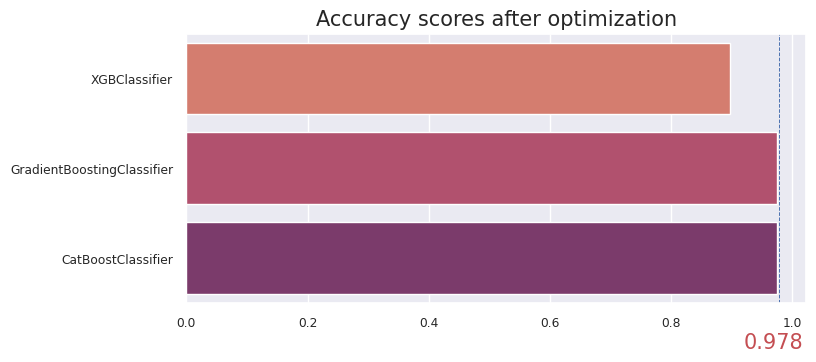

In [24]:
plt.figure(figsize=(8,3.5))
sns.barplot(x=accuracy_list, y=model_name_list, palette="flare")
plt.title("Accuracy scores after optimization", fontsize=15)
plt.axvline(0.978, ls="--", lw=0.7, color="b")
plt.text(0.92, 3, s="0.978", fontsize=15, color="r")
plt.show()

# Classification Reports

In [25]:
for i in (xgb_1, grad_2, catb_3):
    y_pred = i.predict(X_test_scaled)
    clas_report = classification_report(y_test, y_pred)
    print(f"\n----------------- {i.__class__.__name__} ---------------\n")
    print(clas_report)


----------------- XGBClassifier ---------------

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39


----------------- GradientBoostingClassifier ---------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        29

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39


----------------- CatBoostClassifier ---------------

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        29

    accuracy  



*   Precision: Measures how many predicted positive cases were actually positive.

*   Recall: Measures how many actual positive cases were correctly identified.

* F1-score: Balances precision and recall—higher values indicate a strong classifier.

* Accuracy: Shows overall correctness of predictions.




Confusion Matrices

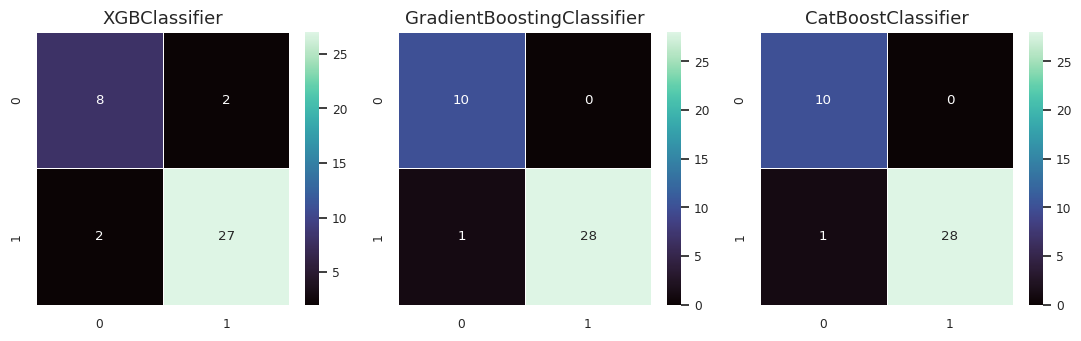

In [26]:
plt.figure(figsize=(11, 3.5))
j = 0
for i in (xgb_1, grad_2, catb_3):
    y_pred = i.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(1,3, j+1)
    sns.heatmap(cm, annot=True, fmt="g", cmap="mako", linewidths=0.5)
    plt.title(f"{i.__class__.__name__}", fontsize=13)
    j += 1
plt.tight_layout()
plt.show()


# ROC Curve


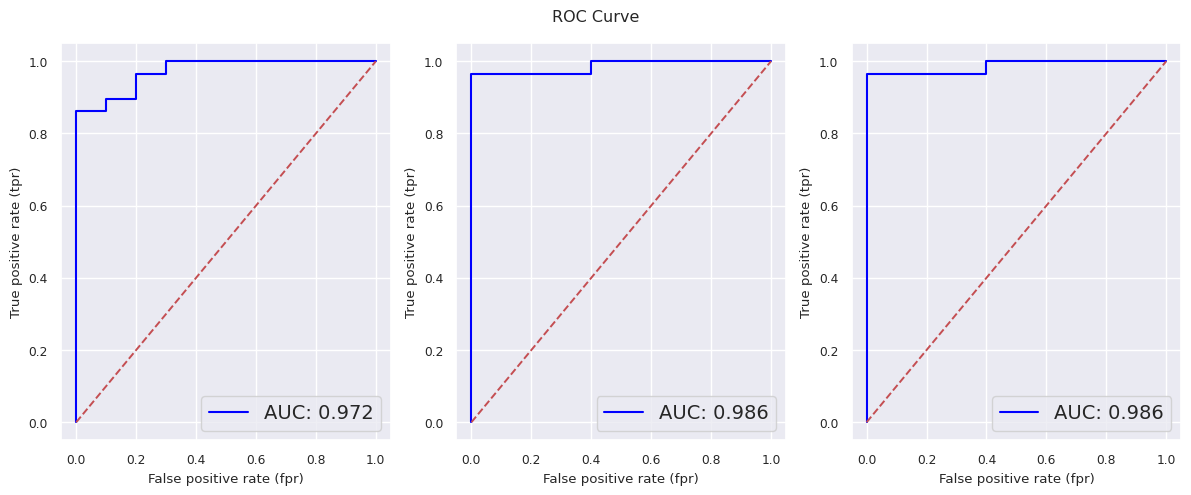

In [27]:
plt.figure(figsize=(12,5))
j = 1
for i in (xgb_1, grad_2, catb_3):
    y_prob = i.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)


    plt.subplot(1,3, j)
    plt.plot(fpr, tpr, color="blue", label= f"AUC: {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
    plt.legend(fontsize=14)
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.suptitle("ROC Curve")
    j += 1
plt.tight_layout()
plt.show()





In [28]:
#best_model = catb_3  # or xgb_1, or grad_2


# **Explainable AI**

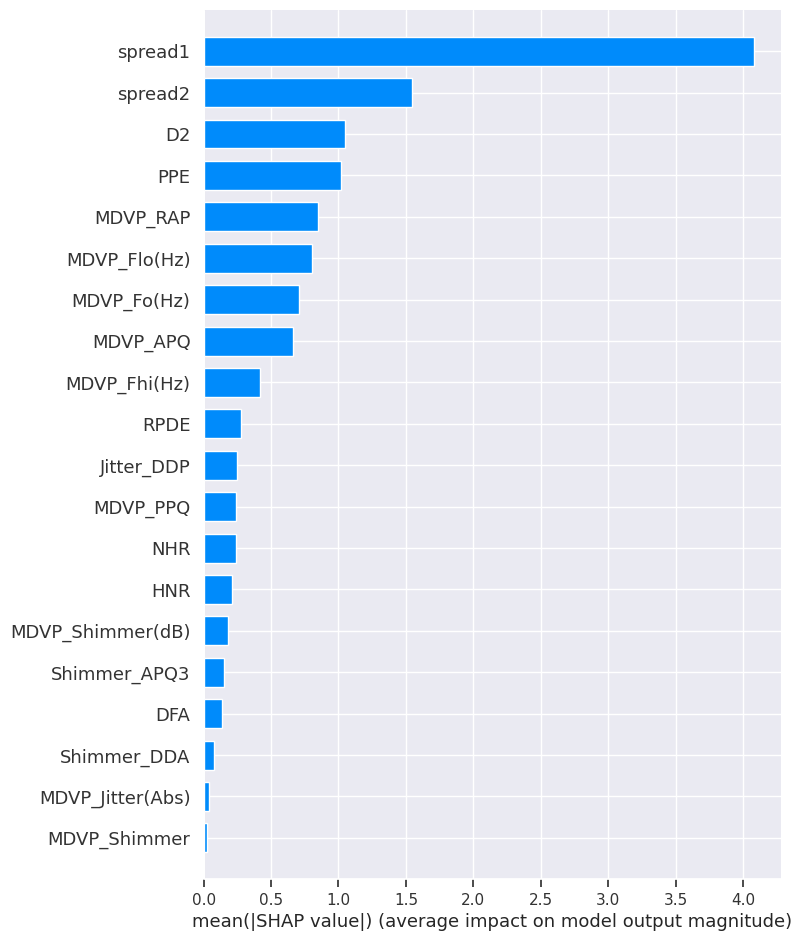

<Figure size 640x480 with 0 Axes>

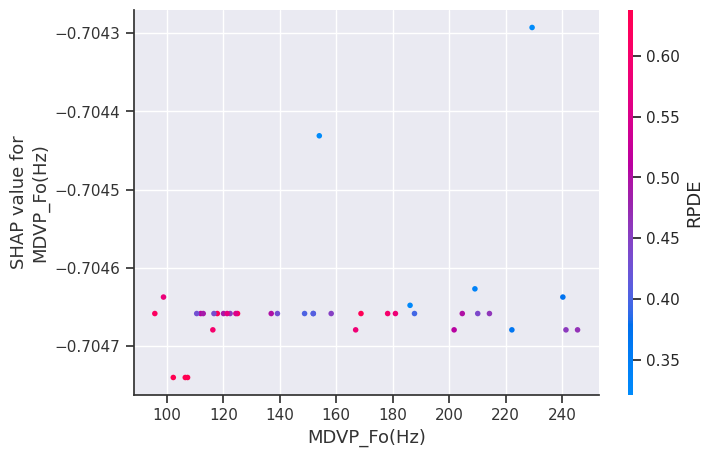

<Figure size 640x480 with 0 Axes>

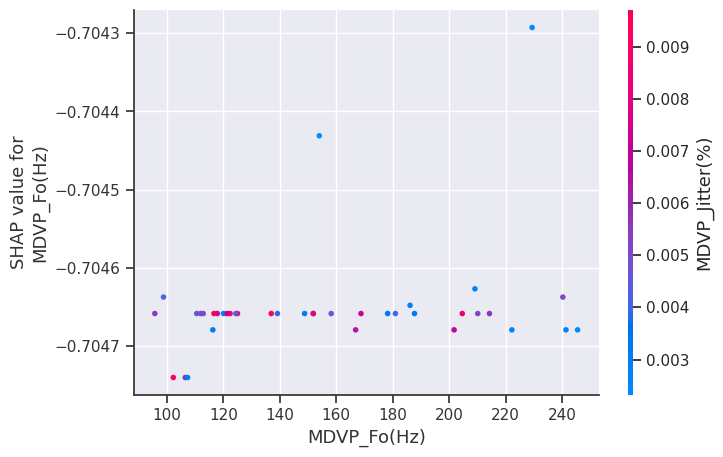

In [29]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

shap.initjs()

# Set your trained model
best_model = catb_3  # replace with xgb_1 or grad_2 as needed

# Feature names (fallback to columns if not provided)
feature_names = X_test.columns.tolist()

# Initialize SHAP Tree Explainer
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# 📊 1. Global feature importance (bar plot)
plt.figure()
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")
plt.show()

# 📈 2. Local explanation for a specific patient (force plot)
patient_idx = 0
shap.initjs() # Initialize Javascript for SHAP plots

force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[patient_idx],
    X_test.iloc[patient_idx],
    feature_names=feature_names
)

# 🔬 3. Dependence plot for a specific feature
plt.figure()
shap.dependence_plot("MDVP_Fo(Hz)", shap_values, X_test, feature_names=feature_names)
plt.show()

# 🔁 4. Interaction plot for two features
plt.figure()
shap.dependence_plot(
    "MDVP_Fo(Hz)",
    shap_values,
    X_test,
    interaction_index="MDVP_Jitter(%)",
    feature_names=feature_names
)
plt.show()

# Step 1: Prepare X_test as DataFrame
X_test_df = pd.DataFrame(X_test, columns=df.drop('status', axis=1).columns)

# Step 2: Use TreeExplainer (recommended for CatBoost)
explainer = shap.TreeExplainer(catb_3)
shap_values_array = explainer.shap_values(X_test_df)  # NumPy array

# Step 3: Convert to SHAP Explanation object
explanation = shap.Explanation(
    values=shap_values_array,
    base_values=explainer.expected_value,
    data=X_test_df.values,
    feature_names=X_test_df.columns.tolist()
)

# ✅ Step 4: Visualize full dataset force plot (training predictions)
shap.initjs()
shap.plots.force(explanation[:100])  # Limit to 100 for performance



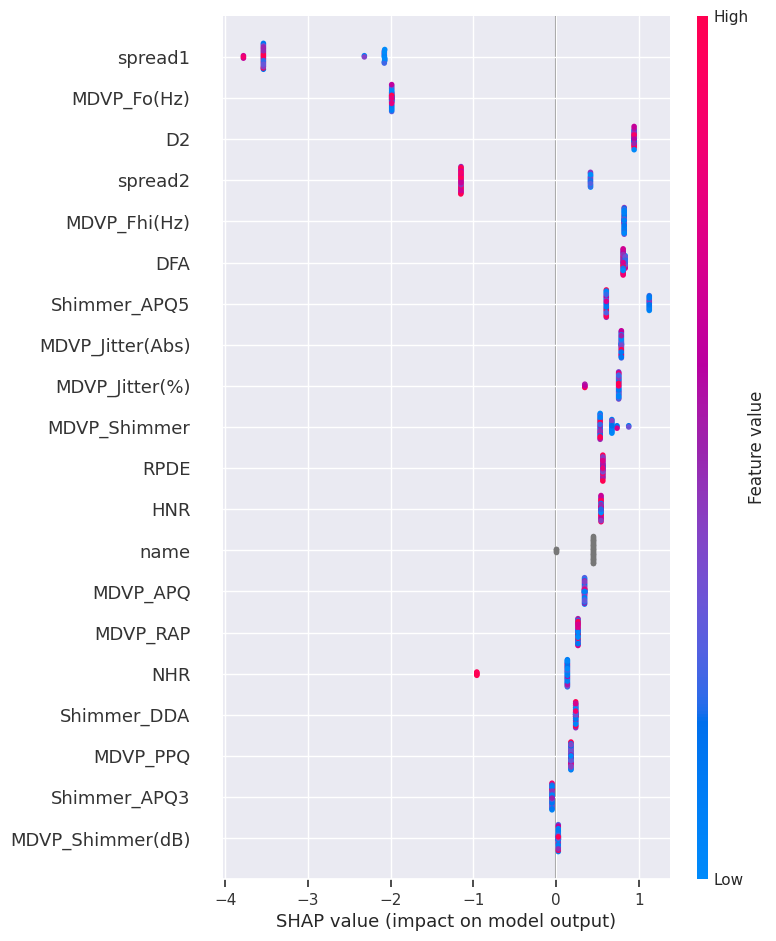

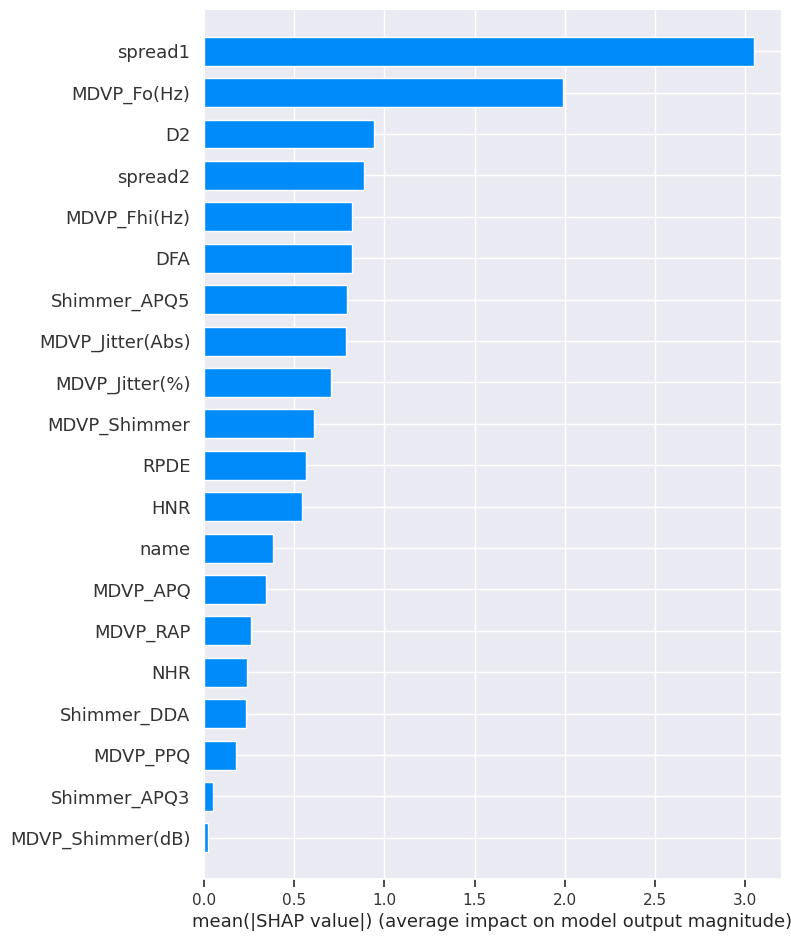

In [30]:
#optional xAI
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Assumes model = catb_3, and X_test is a NumPy array
# Step 1: Convert X_test to DataFrame with feature names
X_test_df = pd.DataFrame(X_test, columns=df.drop('status', axis=1).columns)

# Step 2: SHAP TreeExplainer (preferred for CatBoost)
explainer = shap.TreeExplainer(catb_3)

# Step 3: Get SHAP values
shap_values = explainer.shap_values(X_test_df)

# Step 4: Summary plot (beeswarm)
shap.summary_plot(shap_values, X_test_df)

# Step 5: Bar plot
shap.summary_plot(shap_values, X_test_df, plot_type='bar')

# Step 6: Force plot (local explanation for one sample)
sample_idx = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[sample_idx], X_test_df.iloc[sample_idx])


Feature Importance

Text(0.5, 1.0, "Parkinson's Voice Analysis - Global Feature Importance")

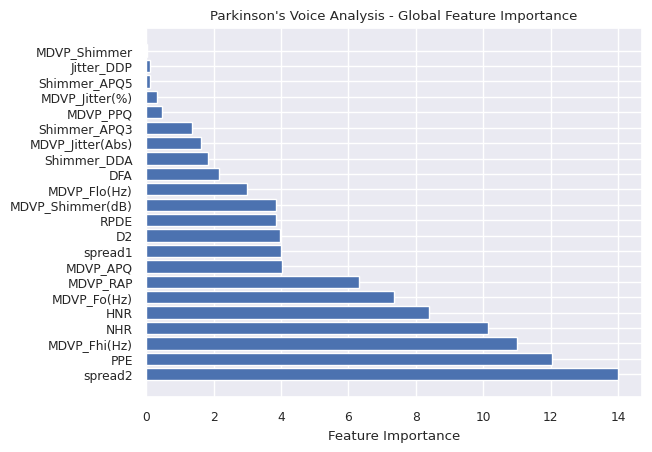

In [31]:
# Built-in feature importance
importances = best_model.feature_importances_

# Sort and visualize
sorted_idx = importances.argsort()[::-1]
plt.barh(range(X_train.shape[1]), importances[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Parkinson's Voice Analysis - Global Feature Importance")

**Clinical Interpretation of Voice Features**

For Parkinson's voice analysis, focus on explaining these clinically meaningful features:

Feature  	Clinical Meaning	Typical Parkinson's Pattern

Jitter	Voice pitch variability	Increased (≥1.04%)
Shimmer	Voice amplitude variability	Increased (≥3.81%)
HNR	Harmonic-to-noise ratio	Decreased (≤20 dB)
PPE	Pitch period entropy	Increased (≥0.5)
VUV	Voiced/unvoiced segments	More irregular transitions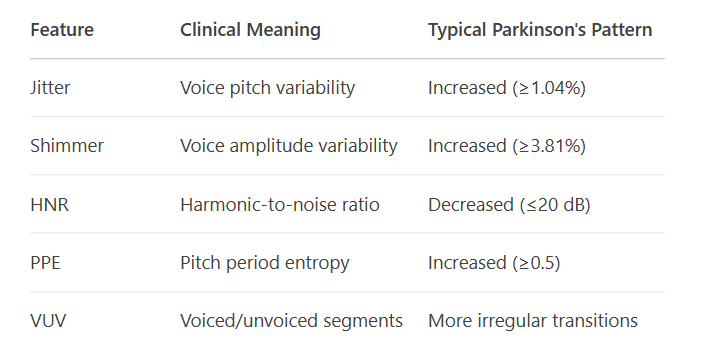

# mlflow

In [32]:
# Create requirements.txt
requirements = '''
streamlit
pandas
numpy
scikit-learn
xgboost
joblib
shap
matplotlib
mlflow
'''

with open("requirements.txt", "w") as f:
    f.write(requirements.strip())

print("✅ requirements.txt created")


✅ requirements.txt created


In [35]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

!pip install mlflow
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# Set seeds for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

def load_data(path):
    df = pd.read_csv(path)
    return df

def preprocess_data(df):
    # Ensure 'name' column is dropped as it's not numeric
    X = df.drop(['name', 'status'], axis=1)
    y = df['status']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Convert scaled X back to DataFrame to preserve feature names for SHAP/MLflow input example
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    return train_test_split(X_scaled_df, y, test_size=0.2, random_state=SEED), scaler

def train_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)
    return acc, report, preds

def save_model(model, path):
    joblib.dump(model, path)

def load_model(path):
    return joblib.load(path)

# Example usage
if __name__ == "__main__":
    from catboost import CatBoostClassifier

    data_path = "/content/Parkinsson disease.csv"  # <- Replace with your real path
    df = load_data(data_path)
    (X_train, X_test, y_train, y_test), scaler = preprocess_data(df)

    model = CatBoostClassifier(
        n_estimators=1939,
        max_depth=5,
        learning_rate=0.266667, # Using a value in the optimized range from the previous cell (example value, replace with actual best_trial.params if different)
        l2_leaf_reg=0.045455, # Using a value in the optimized range from the previous cell (example value)
        border_count=20,
        leaf_estimation_iterations=60, # Using a value in the optimized range from the previous cell (example value)
        random_strength=0.05, # Using a value in the optimized range from the previous cell (example value)
        bagging_temperature=19,
        colsample_bylevel=0.3, # Using a value in the optimized range from the previous cell (example value)
        random_state=SEED,
        eval_metric='Accuracy',
        verbose=False
    )
    model_name = "CatBoost"


    with mlflow.start_run():
        mlflow.set_tag("author", "Your Name")
        mlflow.set_tag("model_type", model_name)

        mlflow.log_params(model.get_params())

        model = train_model(X_train, y_train, model)
        acc, report, preds = evaluate_model(model, X_test, y_test)

        mlflow.log_metric("accuracy", acc)
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for m_name, val in metrics.items():
                    mlflow.log_metric(f"{label}_{m_name}", val)

        # Confusion matrix plot
        disp = ConfusionMatrixDisplay.from_predictions(y_test, preds)
        plt.title("Confusion Matrix")
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()

        # Signature: use full X_test, not just predictions
        signature = infer_signature(X_test, model.predict(X_test))
        input_example = X_test[:5]

        mlflow.sklearn.log_model(model, artifact_path="model", signature=signature, input_example=input_example)

        # Save via joblib
        model_path = f"{model_name}_model.pkl"
        save_model(model, model_path)
        mlflow.log_artifact(model_path)

        print(f"Model saved to {model_path}, accuracy: {acc:.4f}")


Model saved to CatBoost_model.pkl, accuracy: 0.9487


In [36]:
import mlflow
print("MLflow version:", mlflow.__version__)


MLflow version: 2.22.0


In [37]:
# ✅ Parkinson's Disease Detection with MLOps and XAI
# Enhanced version of your notebook with MLflow, SHAP, model saving, and reproducibility.

# Run in Colab: install required packages
# !pip install shap xgboost mlflow joblib matplotlib pandas scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import mlflow
import mlflow.sklearn
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from mlflow.models.signature import infer_signature

# Load data (upload or adjust path if needed)
df = pd.read_csv("Parkinsson disease.csv")
df = df.drop(columns=["name"])

X = df.drop("status", axis=1)
y = df["status"]
feature_names = X.columns.tolist()

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Save scaler for deployment
os.makedirs("model", exist_ok=True)
joblib.dump(scaler, "model/scaler.pkl")

# Train model and log with MLflow
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

with mlflow.start_run():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    # Log parameters and metrics
    mlflow.log_param("model", "XGBoost")
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("roc_auc", roc)

    # Save model
    joblib.dump(model, "model/xgb_model.pkl")
    signature = infer_signature(X_test, y_pred)
    mlflow.sklearn.log_model(model, "model", signature=signature)

    # SHAP explainability
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)

    shap_path = "model/shap_summary.png"
    plt.figure()
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
    plt.tight_layout()
    plt.savefig(shap_path)
    plt.close()
    mlflow.log_artifact(shap_path)

    print(f"Model accuracy: {acc:.4f}, ROC AUC: {roc:.4f}")
    print(f"Model, scaler, and SHAP summary plot saved in 'model/' folder.")

Model accuracy: 0.9487, ROC AUC: 0.9375
Model, scaler, and SHAP summary plot saved in 'model/' folder.
